In [1]:
import numpy
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import cv2 as cv
from keras import backend as bknd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base = '/content/drive/MyDrive/chest_xray'

train = base + '/train'
test = base + '/test'
val = base + '/val'

normal = train + '/NORMAL'
pneumonia = train + '/PNEUMONIA'

os.listdir(base)

['.DS_Store', 'val', 'test', 'train']

NORMAL2-IM-0474-0001.jpeg
Image size :  (1728, 1619, 3)


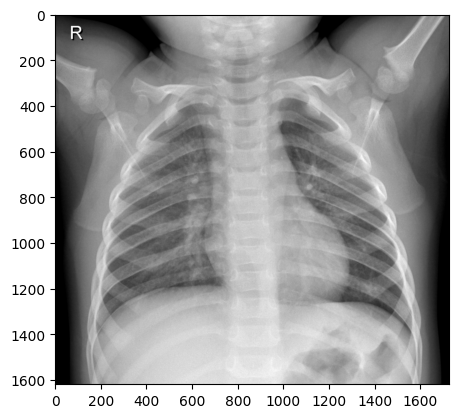

In [4]:
random_img = random.choice(os.listdir(normal))
print(random_img)
img_path = os.path.join(normal, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

person926_virus_1583.jpeg
Image size :  (1312, 872, 3)


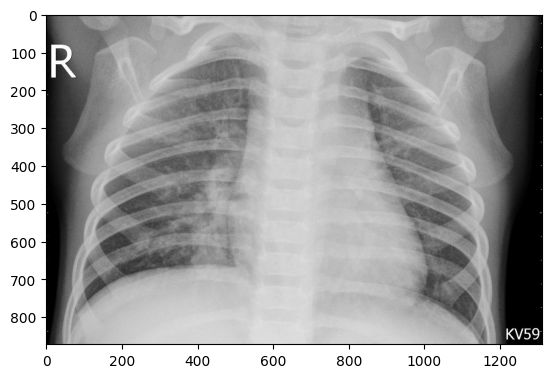

In [5]:
random_img = random.choice(os.listdir(pneumonia))
print(random_img)
img_path = os.path.join(pneumonia, random_img)
img_sample = cv.imread(img_path)
height, width, channels = img_sample.shape
print("Image size : ",(width, height, channels))
plt.figure()
plt.imshow(img_sample)

In [6]:
train_df = []
for img in os.listdir(normal):
    train_df.append((img, 0))

for img in os.listdir(pneumonia):
    train_df.append((img, 1))

train_df = pd.DataFrame(train_df, columns=['images', 'label'],index=None)
train_df

,images,label
0,IM-0539-0001-0001.jpeg,0
1,IM-0533-0001.jpeg,0
2,IM-0519-0001.jpeg,0
3,IM-0523-0001.jpeg,0
4,IM-0540-0001.jpeg,0
...,...,...
5216,person1409_bacteria_3585.jpeg,1
5217,person1414_bacteria_3627.jpeg,1
5218,person1413_bacteria_3613.jpeg,1
5219,person1411_bacteria_3607.jpeg,1


In [7]:
shuffled_train_df = train_df.sample(frac=1).reset_index(drop=True)
shuffled_train_df

,images,label
0,person387_bacteria_1770.jpeg,1
1,person897_bacteria_2822.jpeg,1
2,person68_bacteria_336.jpeg,1
3,person841_bacteria_2761.jpeg,1
4,person538_virus_1068.jpeg,1
...,...,...
5216,person1689_bacteria_4473.jpeg,1
5217,NORMAL2-IM-0464-0001.jpeg,0
5218,person321_virus_648.jpeg,1
5219,NORMAL2-IM-0481-0001.jpeg,0


In [8]:
fig = go.Figure(
    data=[go.Bar(x=shuffled_train_df['label'],y=shuffled_train_df['images'], marker_color='red')]
)

fig.update_layout(
    title='Bar Graph Example',
    xaxis_title='Categories',
    yaxis_title='Values',
    template='plotly',
)

fig.show()

In [9]:
shuffled_train_df.shape

(5221, 2)

In [10]:
X_train = shuffled_train_df['images']
y_train = shuffled_train_df['label']

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)



Found 5219 images belonging to 2 classes.


In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/val',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 628 images belonging to 2 classes.


In [14]:
cnn = Sequential()

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',input_shape=(64,64,3),padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Conv2D(filters =32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2),strides = 2))

cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [15]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
cnn.fit(x = training_set,validation_data=val_set,epochs=100)

Epoch 1/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 626s 4s/step - accuracy: 0.7732 - loss: 0.4981 - val_accuracy: 0.5625 - val_loss: 0.8442
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 115s 681ms/step - accuracy: 0.9013 - loss: 0.2372 - val_accuracy: 0.8125 - val_loss: 0.5335
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 141s 673ms/step - accuracy: 0.9189 - loss: 0.2005 - val_accuracy: 0.5625 - val_loss: 1.2329
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 146s 694ms/step - accuracy: 0.9256 - loss: 0.1879 - val_accuracy: 0.7500 - val_loss: 0.4963
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 139s 675ms/step - accuracy: 0.9317 - loss: 0.1689 - val_accuracy: 0.6250 - val_loss: 0.7893
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 141s 675ms/step - accuracy: 0.9446 - loss: 0.1536 - val_accuracy: 0.6250 - val_loss: 0.6758
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 114s 670ms/step - accuracy: 0.9492 - loss: 0.1399 - val_accuracy: 0.8750 - val_loss: 0.2943
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 115s 680ms/step - accuracy: 0.9

In [25]:
cnn.save('cnn.h5')

In [21]:
train_loss, train_accuracy = cnn.evaluate(training_set, verbose=1)
val_loss, val_accuracy = cnn.evaluate(val_set, verbose=1)

164/164 ━━━━━━━━━━━━━━━━━━━━ 95s 580ms/step - accuracy: 0.9847 - loss: 0.0362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.8750 - loss: 0.2784


In [26]:
test_loss, test_accuracy = cnn.evaluate(test_set,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



20/20 ━━━━━━━━━━━━━━━━━━━━ 167s 9s/step - accuracy: 0.9206 - loss: 0.4289


In [27]:
print("Training Accuracy: ",train_accuracy)
print("Validation Accuracy: ",val_accuracy)
print("Test Accuracy: ",test_accuracy)

Training Accuracy:  0.9835217595100403
Validation Accuracy:  0.875
Test Accuracy:  0.9140127301216125
